<a href="https://colab.research.google.com/github/Trantracy/Analyze-the-Salary-and-year-experience/blob/master/Salary%20and%20year%20experience_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
df = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/Salary_Data.csv')

In [0]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [0]:
df[:3]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


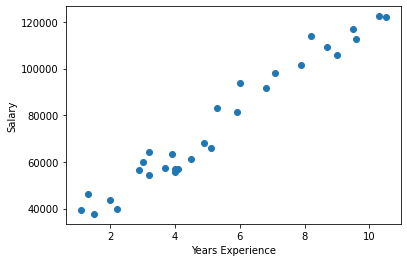

In [0]:
# Plot the relationship between YearEx and Salary
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [0]:
df[['YearsExperience']].to_numpy().shape

(30, 1)

In [0]:
df['Salary'].to_numpy().reshape(-1, 1).shape

(30, 1)

In [0]:
# X and y must be same len
X = df[['YearsExperience']].to_numpy() # 2D
y = df['Salary'].to_numpy().reshape((-1, 1)) # 1D

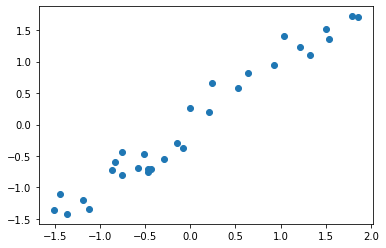

In [0]:
# Standardization
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

# plot data after scaling
plt.scatter(X, y)
plt.show()

Shape of w: (1, 1)
Shape of b: (1, 1)
Shape of X: (30, 1)
Shape of y_hat: (30, 1)


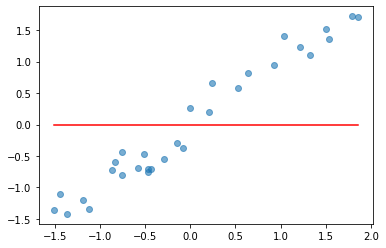

In [0]:
# Create a Linear Regression model
def predict(w, X, b):
  y = w*X + b

  return y

# Plot the model
w = np.zeros((1, 1)) # 2D matrix with single element
b = np.zeros((1, 1)) # 2D matrix with single element

y_hat = predict(X, w, b) 

print(f"Shape of w: {w.shape}")
print(f"Shape of b: {b.shape}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y_hat: {y_hat.shape}")

 
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_hat, c='r')

plt.show()

In [0]:
# Calculate the mean squared error of the model
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

print(f"MSE of our initial model: {mse(y, y_hat)}")


MSE of our initial model: 0.9999999999999999


### Optimize the model

In [0]:
# Learning rate
alpha = 0.5

# Number of rows (observations)
n = X.shape[0] 

In [0]:
# the Backward Propagation function
def backward():
    global y_hat, w, b

    dw = (-2/n) * (np.dot(X.T, (y - y_hat)))
    db = (-2/n) * np.sum(y - y_hat, keepdims = True)

    w = w - (alpha * dw)
    b = b - (alpha * db)

    # Forward propagation
    y_hat = np.dot(X, w) + b

    return mse(y, y_hat)


In [0]:
# Number of time we will repreat the gradient descent process
iterations = 1000

# Create a list containing the mse after each interation
mse_list = []

MSE: 0.04304333585649147
b: [[4.81096644e-17]]
w: [[0.97824162]]


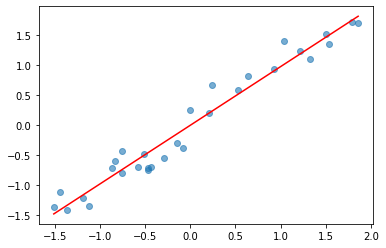

In [0]:
# Train (Fit) our model
for i in range(iterations):
  mse_list.append(mse(y, y_hat))
  backward()

print(f"MSE: {mse_list[-1]}")
print(f"b: {b}")
print(f"w: {w}")

# Plot model after training
plt.scatter(X, y, alpha = 0.6)
plt.plot(X, y_hat, c='r')

plt.show()

In [0]:
# Animate the training process
from matplotlib import animation, rc
rc('animation', html='jshtml')
%matplotlib inline

# Re-initialize the parameters
w = np.zeros((1, 1))
b = np.zeros((1, 1))

y_hat = predict(X, w, b)

fig, ax = plt.subplots()

plt.scatter(X, y, alpha=0.7)
line, = plt.plot(X, y_hat, c='r')
text = ax.text(20, 0, 'MSE %f, w=%f, b=%f' % (mse(y, y_hat), w, b))

plt.close()

costs = []
def animate(i):
    costs.append(backward())
    line.set_ydata(y_hat)
    text.set_text('MSE %f, w=%f, b=%f' % (mse(y, y_hat), w, b))
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=100, blit=True)
anim